<a href="https://colab.research.google.com/github/jfb10d/ml-practice/blob/main/fcc_predict_health_costs_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-07-17 15:37:33--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2025-07-17 15:37:33 (7.06 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [5]:
X = dataset.drop('expenses', axis=1)
y = dataset['expenses']

In [6]:
from sklearn.model_selection import train_test_split

# X: Features (independent variables)
# y: Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns = X.columns
X_test.columns = X.columns

In [7]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

In [8]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", ordinal_transformer, categorical_features),
         ("StandardScaler", numeric_transformer, numerical_features),
    ]
)
X_tr = preprocessor.fit(X_train).transform(X_train)
X_te = preprocessor.fit(X_train).transform(X_test)

In [9]:
model = tf.keras.Sequential([
    layers.Dense(units=96, input_shape=(X_tr.shape[1],)),
    layers.Dense(units=1)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

In [11]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=10, min_delta=10)

history = model.fit(
    X_tr,
    y_train,
    epochs=200,
    # Suppress logging.
    batch_size=144,
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    callbacks=[callback])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 13117.1250 - mean_absolute_error: 13117.1250 - mean_squared_error: 306995232.0000 - val_loss: 12625.5371 - val_mean_absolute_error: 12625.5371 - val_mean_squared_error: 309570240.0000
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 13609.6406 - mean_absolute_error: 13609.6406 - mean_squared_error: 329974560.0000 - val_loss: 12547.5322 - val_mean_absolute_error: 12547.5322 - val_mean_squared_error: 307415904.0000
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14011.9482 - mean_absolute_error: 14011.9473 - mean_squared_error: 350524544.0000 - val_loss: 12405.3262 - val_mean_absolute_error: 12405.3262 - val_mean_squared_error: 303481024.0000
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13391.0967 - mean_absolute_error: 13391.0967 - mean_squared_error: 317720896.0000 - val_loss: 12184.8174 - val_mean_absolute_error: 12184.8174 - val_mean_squared_error: 297444672.0000
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━

In [12]:
test_dataset = X_te
test_labels = y_test

9/9 - 0s - 6ms/step - loss: 3166.9895 - mean_absolute_error: 3166.9895 - mean_squared_error: 42934352.0000
Testing set Mean Abs Error: 3166.99 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


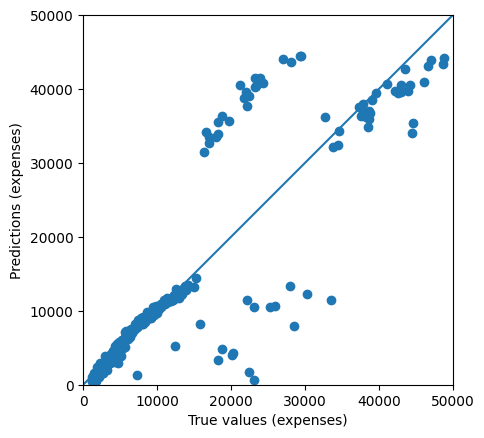

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
